In [1050]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')


In [1051]:
df = pd.read_csv("day.csv",skipinitialspace = True)
pd.set_option("display.max_columns",18)

In [1052]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1053]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1054]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1055]:
#creating a copy of the original dataframe and we will do all the data manipulation on the copy dataframe.
copy_df = df.copy()

In [1056]:
copy_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1057]:
# removing unneccessary columns: dteday,casual,registered,instant:
# also before removing casual and registered columns, we will check if these two columns are thhe subset of cnt column.
copy_df["total"] = copy_df["casual"]+copy_df["registered"]

# to check if two columns have same values we can use equals.
copy_df["cnt"].equals(copy_df["total"])

# since the two columns have same values we can drop casual and registered columns.

copy_df = copy_df.drop(["instant",'dteday','casual','registered','total'],axis= 1)
copy_df.shape

(730, 12)

In [1058]:
copy_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1059]:
# we will map certain categorical variables to make them more interpretable:

copy_df[["yr"]] = copy_df[["yr"]].apply(lambda x : x.map({0:'2018',1:'2019'}))
copy_df[["weekday"]] = copy_df[["weekday"]].apply(lambda x: x.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}))
copy_df[["mnth"]] = copy_df[["mnth"]].apply(lambda x : x.map({1:'Jan',2:"Feb",3:'Mar',4:'Apr',5:'May',6:'Jun',
                                                             7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

In [1060]:
copy_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018,Jan,0,mon,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,2018,Jan,0,tue,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,2018,Jan,0,wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,2018,Jan,0,thu,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,2018,Jan,0,fri,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,2019,Dec,0,fri,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,2019,Dec,0,sat,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,2019,Dec,0,sun,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,2019,Dec,0,mon,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [1061]:

copy_df[["season"]] = copy_df[["season"]].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
copy_df[["weathersit"]] = copy_df[["weathersit"]].apply(lambda x: x.map({1:'clear',2:'misty',3:"snow,light_rain ",4:'heavy_rain'}))

In [1062]:
copy_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,fri,1,misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,0,sat,0,misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,0,sun,0,misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,0,mon,1,clear,10.489153,11.58500,48.3333,23.500518,1796


### EDA:

             mean  median      sum  count   sum_perc  count_perc
yr                                                              
2018  3405.761644    3740  1243103    365  37.774584        50.0
2019  5610.252055    5936  2047742    365  62.225416        50.0


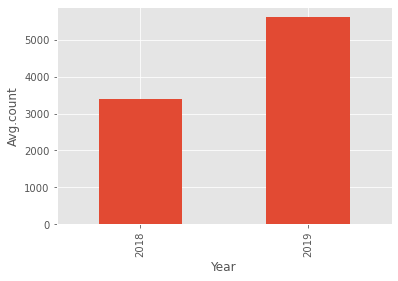

In [1063]:
plt.style.use("ggplot")
g = copy_df.groupby('yr')['cnt'].agg(["mean","median",'sum','count'])
g["sum_perc"] = g["sum"]/copy_df.cnt.sum()*100
g["count_perc"] = g["count"]/copy_df.cnt.count()*100
print(g)
copy_df.groupby("yr")["cnt"].mean().plot.bar()
plt.xlabel("Year")
plt.ylabel("Avg.count")
plt.show()


# Insight : the average bike share count has definitely increased in year 2019 as compared to 2018.

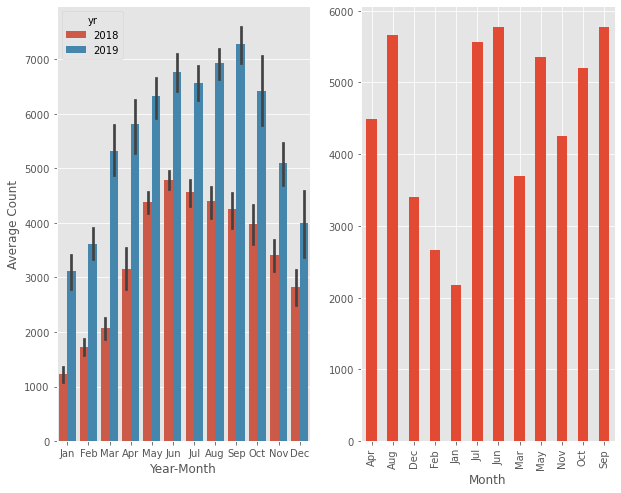

      median         mean     sum  count   sum_perc  count_perc
mnth                                                           
Apr   4293.5  4484.900000  269094     60   8.177049    8.219178
Aug   5229.5  5664.419355  351194     62  10.671849    8.493151
Dec   3444.0  3403.806452  211036     62   6.412821    8.493151
Feb   2438.5  2669.964286  149518     56   4.543453    7.671233
Jan   1939.0  2176.338710  134933     62   4.100254    8.493151
Jul   5446.5  5563.677419  344948     62  10.482049    8.493151
Jun   5308.5  5772.366667  346342     60  10.524409    8.219178
Mar   3216.5  3692.258065  228920     62   6.956268    8.493151
May   4890.5  5349.774194  331686     62  10.079053    8.493151
Nov   4081.0  4247.183333  254831     60   7.743634    8.219178
Oct   5013.0  5199.225806  322352     62   9.795417    8.493151
Sep   5384.0  5766.516667  345991     60  10.513743    8.219178


In [1064]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.barplot(x = 'mnth',y = 'cnt',data = copy_df,hue = 'yr')
plt.xlabel("Year-Month")
plt.ylabel("Average Count")
plt.subplot(1,2,2)
copy_df.groupby('mnth')['cnt'].mean().plot.bar()
plt.xlabel("Month")
plt.show()

z = copy_df.groupby('mnth',as_index = False)['cnt'].agg(['median','mean','sum','count'])
z["sum_perc"] = z['sum']/copy_df.cnt.sum()*100
z['count_perc'] = z['count']/copy_df.cnt.count()*100
print(z)
# insight : Figure on the left :
# The month of Jan in 2018 and 2019 experienced the minimum average number of bike shares.
# For 2018 - The maximum avg bike share was experienced in June 
# For 2019 - The maximum avg bike share was experienced in Sep

# Figure on the right shows the average bike share count per month for both the years.
# august,september and June generally experience more bike shares than any other month.

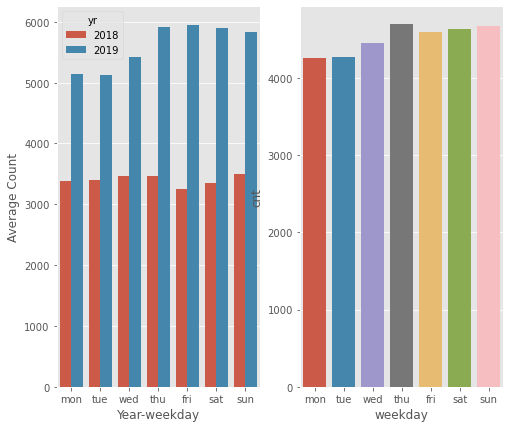

         median         mean     sum  count   sum_perc  count_perc
weekday                                                           
fri      4642.5  4597.423077  478132    104  14.529156   14.246575
mon      4511.0  4259.819048  447281    105  13.591676   14.383562
sat      4572.0  4626.692308  481176    104  14.621655   14.246575
sun      4590.5  4665.721154  485235    104  14.744997   14.246575
thu      4676.0  4691.567308  487923    104  14.826678   14.246575
tue      4381.0  4274.495238  448822    105  13.638503   14.383562
wed      4350.0  4444.961538  462276    104  14.047334   14.246575


In [1065]:
plt.figure(figsize= (8,7))
plt.subplot(1,2,1)
sns.barplot(x = "weekday", y ="cnt",data = copy_df,hue = 'yr',ci = False)
plt.xlabel("Year-weekday")
plt.ylabel("Average Count")
plt.subplot(1,2,2)
sns.barplot(x = "weekday" , y = "cnt",data = copy_df,ci = False)
plt.show()

n = copy_df.groupby('weekday',as_index = False)['cnt'].agg(['median','mean','sum','count'])
n["sum_perc"] = n['sum']/copy_df.cnt.sum()*100
n['count_perc'] = n['count']/copy_df.cnt.count()*100
print(n)
#insight : In 2019, max avg bike shares occured on Friday and in 2018 it was sunday that experienced maximum avg. bike shares.
# Thursday generally sees more bike shares as compared to other weekdays for both the years combined.

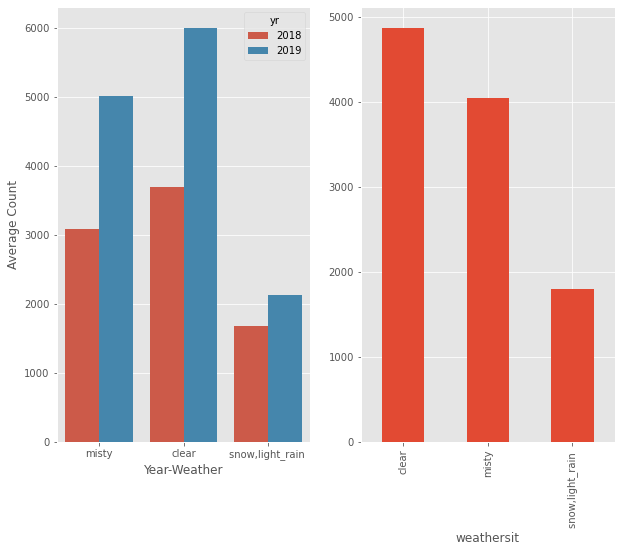

                  median         mean      sum  count   sum_perc  count_perc
weathersit                                                                  
clear               4844  4876.786177  2257952    463  68.613137   63.424658
misty               4043  4044.813008   995024    246  30.236125   33.698630
snow,light_rain     1817  1803.285714    37869     21   1.150738    2.876712


In [1066]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.barplot(x="weathersit",y = 'cnt',hue= 'yr',data = copy_df,ci = False)
plt.xlabel("Year-Weather")
plt.ylabel("Average Count")
plt.subplot(1,2,2)
copy_df.groupby('weathersit')['cnt'].mean().plot.bar()
plt.xlabel("weathersit")
plt.show()

a = copy_df.groupby('weathersit',as_index = False)['cnt'].agg(['median','mean','sum','count'])
a["sum_perc"] = a['sum']/copy_df.cnt.sum()*100
a['count_perc'] = a['count']/copy_df.cnt.count()*100
print(a)
# Insights: As expected when the weather is clear , average bike shares count increases.
# In both 2018-2019 , the bike share is generally higher when the weather outside is clear(68%) or misty(30%). In extreme weather
# conditions you dont expect to ride a bike.

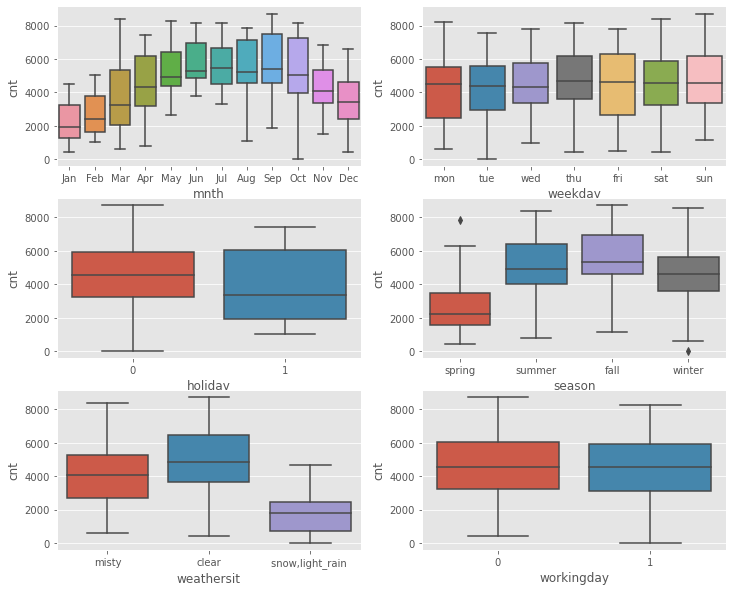

In [1067]:
# Boxplots of categorical variables:
plt.figure(figsize = (12,10))
plt.subplot(3,2,1)
sns.boxplot(x = "mnth",y = "cnt",data = copy_df)
plt.subplot(3,2,2)
sns.boxplot(x = "weekday",y = 'cnt',data = copy_df)
plt.subplot(3,2,3)
sns.boxplot(x = "holiday",y = "cnt",data = copy_df)
plt.subplot(3,2,4)
sns.boxplot(x = "season",y = 'cnt',data  =copy_df)
plt.subplot(3,2,5)
sns.boxplot(x = "weathersit",y = "cnt",data = copy_df)
plt.subplot(3,2,6)
sns.boxplot(x = "workingday",y = "cnt",data = copy_df)
plt.show()

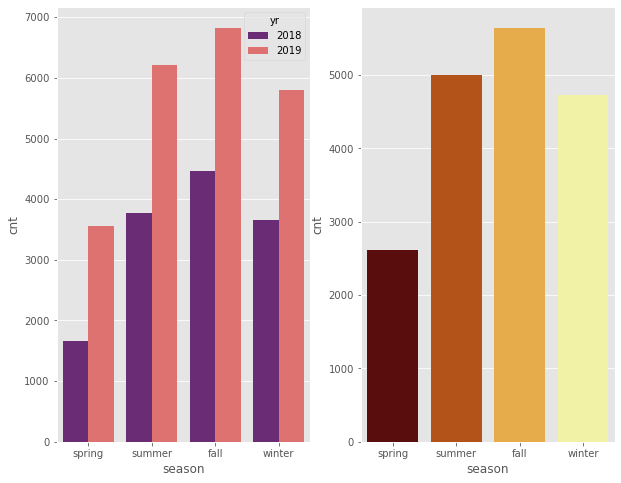

        median         mean      sum  count   sum_perc  count_perc
season                                                            
fall    5353.5  5644.303191  1061129    188  32.244879   25.753425
spring  2222.5  2608.411111   469514    180  14.267278   24.657534
summer  4941.5  4992.331522   918589    184  27.913469   25.205479
winter  4634.5  4728.162921   841613    178  25.574374   24.383562


In [1068]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.barplot(x = "season",y = "cnt",data = copy_df,hue ='yr',ci = False,palette = 'magma')
plt.subplot(1,2,2)
sns.barplot(x = "season",y = "cnt",data = copy_df,ci = False,palette = 'afmhot')
plt.show()

b = copy_df.groupby('season',as_index = False)['cnt'].agg(['median','mean','sum','count'])
b["sum_perc"] = b['sum']/copy_df.cnt.sum()*100
b['count_perc'] = b['count']/copy_df.cnt.count()*100
print(b)
#Insight :  Summer and Fall season generally have a higher bike share in comparison to any other season.
# almost 32% of the bike shares happens in fall season followed by summer.

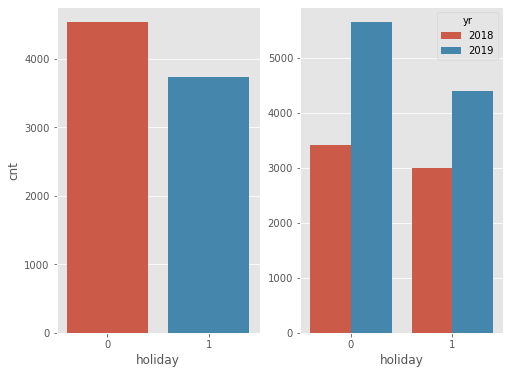

         median        mean      sum  count  sum_perc  count_perc
holiday                                                          
0          4563  4530.90268  3212410    709  97.61657   97.123288
1          3351  3735.00000    78435     21   2.38343    2.876712


In [1069]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
sns.barplot(x = "holiday",y = "cnt",data=copy_df,ci =False)
plt.subplot(1,2,2)
sns.barplot(x = "holiday",y = 'cnt',data = copy_df,hue = 'yr',ci = False)
plt.ylabel("")
plt.show()

m = copy_df.groupby('holiday',as_index = False)['cnt'].agg(['median','mean','sum','count'])
m["sum_perc"] = m['sum']/copy_df.cnt.sum()*100
m['count_perc'] = m['count']/copy_df.cnt.count()*100
print(m)

#Insights  : The bike share count as expected is higher when it is not a holiday(almost 97%).

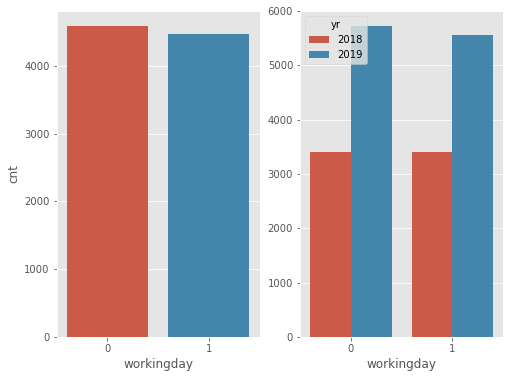

            median         mean      sum  count   sum_perc  count_perc
workingday                                                            
0           4572.0  4587.862832  1036857    226  31.507318   30.958904
1           4544.5  4472.198413  2253988    504  68.492682   69.041096


In [1070]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
sns.barplot(x = "workingday",y = "cnt",data=copy_df,ci =False)
plt.subplot(1,2,2)
sns.barplot(x = "workingday",y = 'cnt',data = copy_df,hue = 'yr',ci = False)
plt.ylabel("")
plt.show()

y = copy_df.groupby('workingday',as_index = False)['cnt'].agg(['median','mean','sum','count'])
y["sum_perc"] = y['sum']/copy_df.cnt.sum()*100
y['count_perc'] = y['count']/copy_df.cnt.count()*100
print(y)

#insight : The bike share is higher for when it is neither a holiday nor weekend(69%).


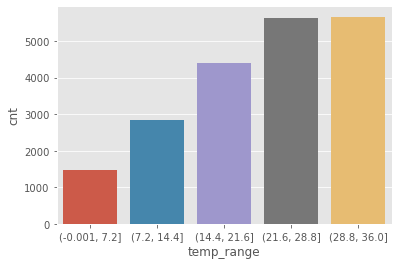

In [1071]:
# we can also create bins to exactly see what temp ranges experiences the maximum bike shares:
bins = np.linspace(0,36,6)
copy_df["temp_range"] = pd.cut(copy_df["temp"],bins = bins,include_lowest = True)
a = copy_df.groupby("temp_range",as_index = False)["cnt"].mean()
sns.barplot(x = "temp_range",y = "cnt",data = a)
plt.show()
copy_df= copy_df.drop('temp_range',axis = 1)

# Insight :  As temperature increases, the bike share count increases. The maximum bike share count is experienced
#           when the temperature is between 28 to 36 degrees celsius.

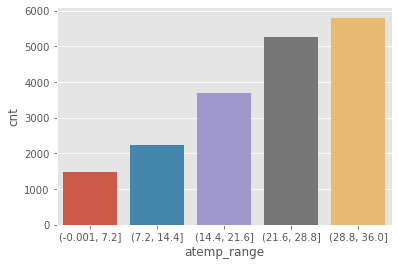

In [1072]:
# we can also create bins to exactly see what temp ranges experiences the maximum bike shares:
bins = np.linspace(0,36,6)
copy_df["atemp_range"] = pd.cut(copy_df["atemp"],bins = bins,include_lowest = True)
a = copy_df.groupby("atemp_range",as_index = False)["cnt"].mean()
sns.barplot(x = "atemp_range",y = "cnt",data = a)
plt.show()
copy_df= copy_df.drop('atemp_range',axis = 1)


               temp     atemp       cnt       hum  windspeed
temp       1.000000  0.991696  0.627044  0.128565  -0.158186
atemp      0.991696  1.000000  0.630685  0.141512  -0.183876
cnt        0.627044  0.630685  1.000000 -0.098543  -0.235132
hum        0.128565  0.141512 -0.098543  1.000000  -0.248506
windspeed -0.158186 -0.183876 -0.235132 -0.248506   1.000000


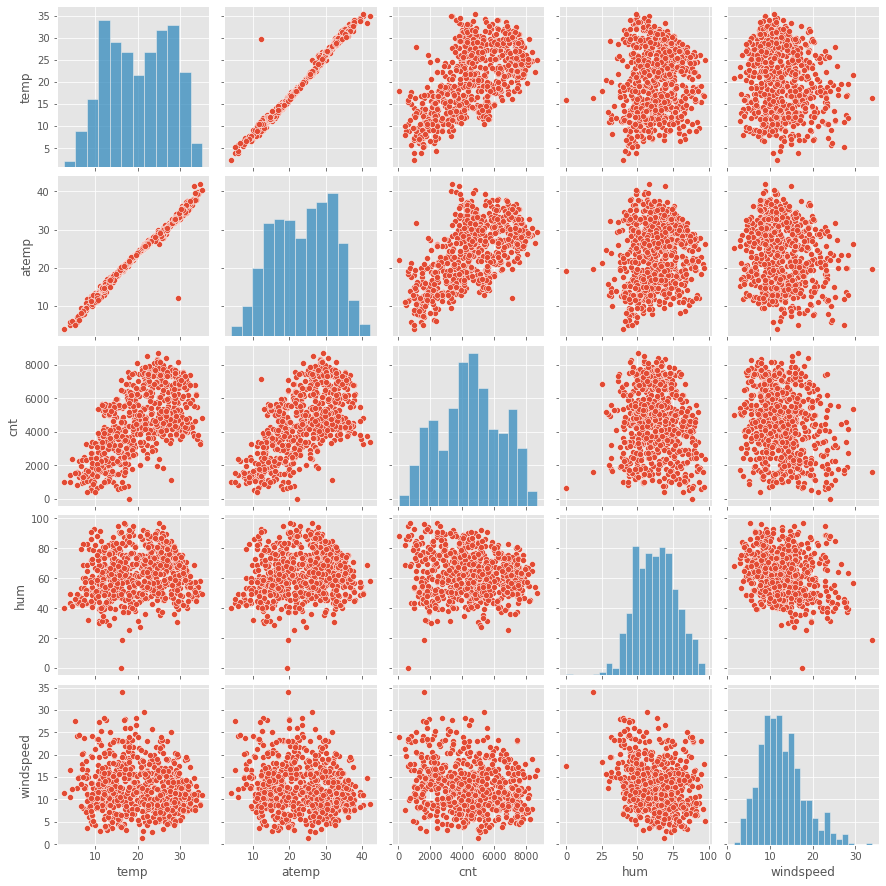

In [1073]:
# relationship between numerical variables:

num_vars  = ["temp",'atemp','cnt','hum','windspeed']
corr = copy_df[num_vars].corr()
print(corr)
sns.pairplot(copy_df[num_vars])

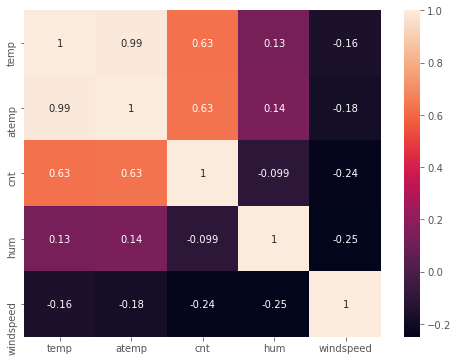

In [1074]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot = True)
plt.show()

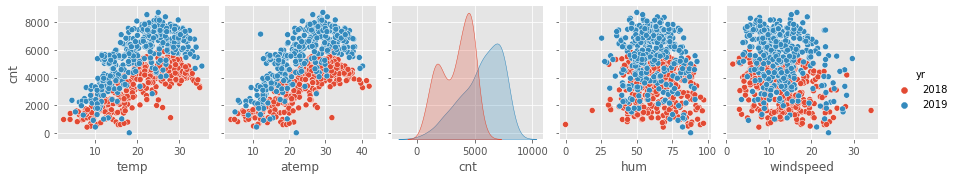

In [1075]:
sns.pairplot(x_vars = copy_df[num_vars],y_vars = 'cnt',data = copy_df,hue = 'yr')
plt.show()

#### Data preparation:

In [1076]:
# we will create dummies for our categorical variables:
season = pd.get_dummies(copy_df["season"],drop_first = True)
weathersit = pd.get_dummies(copy_df["weathersit"],drop_first = True)
month = pd.get_dummies(copy_df['mnth'],drop_first = True)
weekday = pd.get_dummies(copy_df["weekday"],drop_first = True)

In [1077]:
# adding dummy variables to the working dataframe:
copy_df = pd.concat([copy_df,season,weathersit,month,weekday],axis =1)

In [1078]:
#dropping columns for which we created dummy variables:
copy_df= copy_df.drop(["season","weathersit","mnth","weekday"],axis = 1)


In [1079]:
copy_df.shape

(730, 30)

In [1080]:
#changing yr column to how it was before:
copy_df[["yr"]] = copy_df[["yr"]].apply(lambda x : x.map({'2018':0,'2019':1}))

In [1081]:
## creating a train test split for our model:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(copy_df,train_size = 0.70,random_state =1599)
df_train.shape

(510, 30)

In [1082]:
# scaling the variables: Using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [1083]:
df_train.head(3)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed
231,0,0,1,0.808879,0.748105,0.638403,0.133638,0.619784,0,...,0,0,0,1,0,0,0,0,0
305,0,0,1,0.403407,0.408313,0.696937,0.085535,0.499281,0,...,1,0,0,0,0,0,0,0,0
204,0,0,1,0.976770,0.939531,0.476477,0.272739,0.429736,0,...,0,0,0,0,0,0,0,1,0


In [1084]:
# plt.figure(figsize = (10,8))
# sns.heatmap(df_train.corr(),annot = True,annot_kws = {'fontsize':9})
# plt.show()
# a few darkpatches in our heatmap points towards the existence of multicollinearity.

#### Buildng the model:

In [1085]:
# creating x train and y train:
y_train = df_train.pop('cnt')
X_train = df_train

In [1086]:
#using RFE to select features that we want to use as our predictors.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1087]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,17)
rfe = rfe.fit(X_train,y_train)

In [1088]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('misty', True, 1),
 ('snow,light_rain ', True, 1),
 ('Aug', False, 11),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 9),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', False, 3),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 5),
 ('wed', False, 8)]

In [1089]:
# only columns that are supported by RFE
sup_cols = X_train.columns[rfe.support_]
sup_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'misty', 'snow,light_rain ', 'Dec', 'Jan', 'Jul', 'Nov',
       'Oct', 'sat', 'sun'],
      dtype='object')

In [1090]:
X_train_rfe = X_train[sup_cols]
X_train_rfe.shape

(510, 17)

In [1091]:
# using statsmodels to create our first model:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_rfe_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     155.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.47e-185
Time:                        22:34:29   Log-Likelihood:                 501.32
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     492   BIC:                            -890.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4238      0.080      5.303      0.000       0.267       0.581
yr                   0.2399      0.008     28.693      0.000       0.224       0.256
holiday             -0.1341      0.067     -1.987      0.047      -0.267      -0.001
workingday          -0.0807      0.074     -1.090      0.276      -0.226       0.065
temp                 0.4416      0.033     13.547      0.000       0.378       0.506
hum                 -0.1044      0.033     -3.211      0.001      -0.168      -0.041
windspeed           -0.1765      0.028     -6.401      0.000      -0.231      -0.122
spring              -0.1211      0.016     -7.614      0.000      -0.152      -0.090
winter               0.1106      0.023      4.727      0.000       0.065       0.157
misty               -0.0493      0.011     -4.389      0.000      -0.071      -0.027
snow,light_rain     -0.2317      0.031     -7.468      0.000      -0.293      -0.171
Dec                 -0.0919      0.021     -4.340      0.000      -0.133      -0.050
Jan                 -0.0466      0.018     -2.549      0.011      -0.082      -0.011
Jul                 -0.0694      0.016     -4.253      0.000      -0.101      -0.037
Nov                 -0.1013      0.027     -3.766      0.000      -0.154      -0.048
Oct                 -0.0582      0.027     -2.191      0.029      -0.110      -0.006
sat                 -0.0615      0.074     -0.833      0.405      -0.207       0.084
sun                 -0.0469      0.074     -0.635      0.525      -0.192       0.098
==============================================================================
Omnibus:                       91.583   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.968
Skew:                          -0.866   Prob(JB):                     9.62e-57
Kurtosis:                       6.023   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1092]:
#computing VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF["features"] = X_train_rfe.columns
VIF["VIF"] =[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF = VIF.sort_values(by = "VIF",ascending = False)
VIF

,features,VIF
2,workingday,30.241084
4,hum,22.060062
3,temp,21.883563
15,sat,7.528648
16,sun,7.305867
7,winter,7.298070
5,windspeed,5.474817
6,spring,3.695143
13,Nov,3.571699
14,Oct,3.235519


In [1093]:
X_train_rfe = X_train_rfe.drop("workingday",axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr_model.summary())
VIF = pd.DataFrame()
VIF["features"] = X_train_rfe.columns
VIF["VIF"] =[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF = round(VIF.sort_values(by = "VIF",ascending = False),2)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.79e-186
Time:                        22:34:29   Log-Likelihood:                 500.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     493   BIC:                            -895.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3428      0.029  

In [1094]:
X_train_rfe = X_train_rfe.drop("hum",axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr_model.summary())
VIF = pd.DataFrame()
VIF["features"] = X_train_rfe.columns
VIF["VIF"] =[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF = round(VIF.sort_values(by = "VIF",ascending = False),2)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.11e-185
Time:                        22:34:31   Log-Likelihood:                 495.55
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     494   BIC:                            -891.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2965      0.026  

In [1095]:
X_train_rfe = X_train_rfe.drop("winter",axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr_model.summary())
VIF = pd.DataFrame()
VIF["features"] = X_train_rfe.columns
VIF["VIF"] =[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF = round(VIF.sort_values(by = "VIF",ascending = False),2)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.09e-181
Time:                        22:34:31   Log-Likelihood:                 484.89
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     495   BIC:                            -876.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3285      0.025  

In [1096]:
X_train_rfe = X_train_rfe.drop("Nov",axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr_model.summary())
VIF = pd.DataFrame()
VIF["features"] = X_train_rfe.columns
VIF["VIF"] =[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF = round(VIF.sort_values(by = "VIF",ascending = False),2)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.21e-182
Time:                        22:34:31   Log-Likelihood:                 484.44
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     496   BIC:                            -881.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3157      0.021  

In [1097]:
X_train_rfe = X_train_rfe.drop("sat",axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr_model.summary())
VIF = pd.DataFrame()
VIF["features"] = X_train_rfe.columns
VIF["VIF"] =[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF = round(VIF.sort_values(by = "VIF",ascending = False),2)
print(VIF)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.70e-183
Time:                        22:34:32   Log-Likelihood:                 482.89
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     497   BIC:                            -884.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3171      0.021  

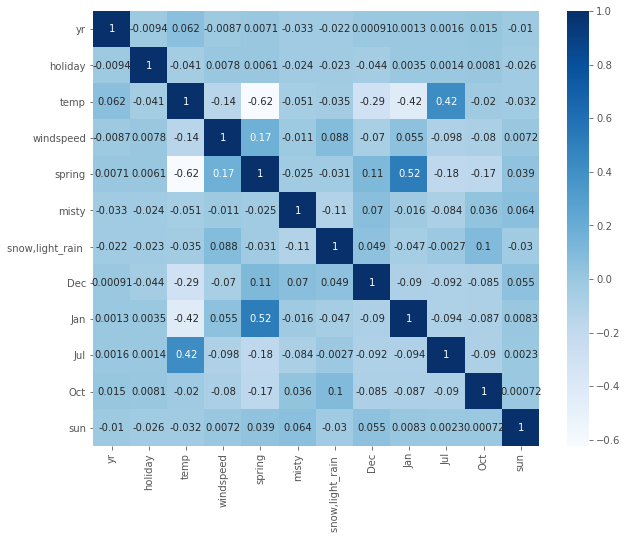

In [1098]:
plt.figure(figsize = (10,8))
sns.heatmap(X_train_rfe.corr(),annot = True,cmap = "Blues")
plt.show()

# this heatmap indicates that there is absence of significant multicollinearity among the variables which is also 
# reflected in our VIF computation for our model where the VIF value for all the predictors is less than 5.

##### Interpretation of our final model:

In [1099]:
(lr_model.params)

const               0.317123
yr                  0.245004
holiday            -0.071064
temp                0.406863
windspeed          -0.164846
spring             -0.145451
misty              -0.068248
snow,light_rain    -0.278646
Dec                -0.037448
Jan                -0.038059
Jul                -0.066947
Oct                 0.037916
sun                 0.032087
dtype: float64

###### Equation for our response surface: 
###### cnt = 0.317123 + (0.245004) * yr - (0.071064) * holiday + (0.406863)* temp - (0.164846) * windspeed - (0.145451) * spring -(0.068248) * misty - (0.278646) * snow,light_rain - (0.037448) * Dec - (0.038059) * Jan - (0.066947) * Jul + (0.037916) * Oct + (0.032087) * sun


#### The four most important predictor variables to predict the bike count as per our machine learning model based on its
#### coefficient values are "Temperature","Year","snow,light_rain", and "Windspeed". Our model has negative as well as positive 
#### Coefficients of independent variables which indicates how change in one unit of our predictor variable impacts our dependent variable and in which direction the movement is going to be.

#### e.g.- 1 unit change in temperature increases the bike count by 0.406863 units. 
#### e.g.- 1 unit change in windspeed decreases the bike count by0.164846 units.
        

#### Prediction:

In [1100]:
y_train_pred= lr_model.predict(X_train_rfe_sm)

In [1101]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1102]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1103]:
# columns that were in the final model:
cols = X_train_rfe.columns
X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
y_pred = lr_model.predict(X_test_sm)

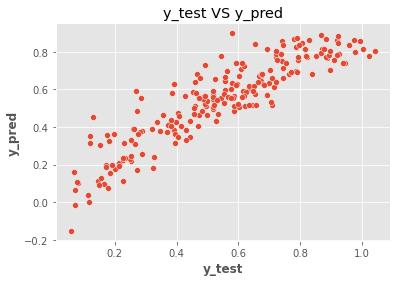

In [1104]:
sns.scatterplot(y_test,y_pred)
plt.title('y_test VS y_pred')
plt.xlabel("y_test",fontweight = 'bold')
plt.ylabel('y_pred',fontweight = "bold")
plt.show()

#### Validating the assumptions:

#### Assumptions of Linear Regression:

- Linear relationship between dependent and independent variables.
- Errors have no identifiable pattern
- Errors are normally distributed.
- Mean of residuals or errors is 0.

In [1105]:
error_train = y_train - y_train_pred
error_test = y_test - y_pred

In [1106]:
#checking mean of error term :
mean_of_error_train = np.mean(error_train)
print(round(mean_of_error_train))

# Insight : The mean of error term is indeed 0. This assumption is not violated by our model.


0


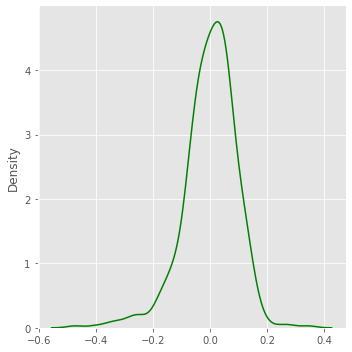

In [1107]:
# normality of error terms:

sns.displot(error_train,kind= 'kde',label = 'train',color = "green")
plt.show()
# sns.displot(error_test,kind= 'kde',label = 'test',color= 'red')


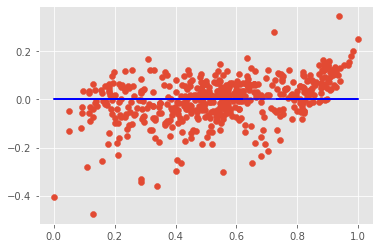

In [1108]:
#### No identifiable pattern in our error terms i.e. Homoscedasticity
plt.scatter(y_train,error_train)
plt.plot(y_train,(y_train-y_train),'b')

##### Model Evaluation:

In [1109]:
r2_test = r2_score(y_test,y_pred)
print("R2 on test set : ",r2_test)
# r2 on train
r2_train= r2_score(y_train,y_train_pred)
print("R2 on train set: ",r2_train)

R2 on test set :  0.8122610234870449
R2 on train set:  0.8311337088953313


In [1110]:
#calculated adjusted R2 for test:
# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
n = X_test.shape[0]
k = X_test.shape[1]
adj_R2_test =round(1-(1-r2_test)*(n-1)/(n-k-1),4)
adj_R2_test

0.8014

In [1111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [1112]:
mse_train = round(mean_squared_error(y_train,y_train_pred),5)
mse_test = round(mean_squared_error(y_test,y_pred),5)
print(mse_train)
print(mse_test)

0.00881
0.01081


In [1113]:
rmse_train = round(np.sqrt(mse_train),5)
rmse_test = round(np.sqrt(mse_test),5)
print(rmse_train)
print(rmse_test)

0.09386
0.10397


In [1114]:
mae_train = round(mean_absolute_error(y_train,y_train_pred),5)
mae_test  =round(mean_absolute_error(y_test,y_pred),5)
print(mae_train)
print(mae_test)

0.06939
0.07957


In [1115]:
dic = {"Metric":["R2","Adj.R2","MSE","RMSE","MAE"],
      'Train':[0.8311,0.827,0.00881,0.09386,0.06939],
       'Test':[0.8122,0.8014,0.01081,0.10397,0.07957],
      }
model_metrics =pd.DataFrame(dic)
model_metrics = model_metrics.set_index("Metric")
print(model_metrics)

          Train     Test
Metric                  
R2      0.83110  0.81220
Adj.R2  0.82700  0.80140
MSE     0.00881  0.01081
RMSE    0.09386  0.10397
MAE     0.06939  0.07957


#### Insights : Looking at the metrics for our train and test set, the model seems quite reliable and generalises on the 
#### test set satisfactorily. We do not experience a steep fall in adjusted R2 from train to test set. Also our model explains
#### 83% of the variance in the train set as well 81% of the variance in the test set which is a good score.
#### The RMSE,MSE,MAE values are all closer to 0 indicating that it is a good model.